# Assignment 6: _Dimensionality Reduction and Signal Processing_

This assignment will explore: _i)_ reducing the complexity of data analyses by reducing high-dimensional data to something more workable, and _ii)_ processing time-series signal data, such as that obtained from intracranial recordings.

This assignment is worth 5 points (5% of your grade). 

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE.**

**PLEASE DO NOT COPY & PASTE OR DELETE CELLS INCLUDED IN THE ASSIGNMENT.**

_**PLEASE MAKE SURE ALL PLOTS ARE VISIBLE IN YOUR SUBMITTED ASSIGNMENT**_

## How to complete assignments

Whenever you see:

```
# YOUR CODE HERE
raise NotImplementedError()
```

You need to **replace (meaning, delete) these lines of code with code that answers the questions** and meets the specified criteria. Make sure you remove the 'raise' line when you do this (or your notebook will raise an error, regardless of any other code, and thus fail the grading tests).

You should write the answer to the questions in those cells (the ones with `# YOUR CODE HERE`), but you can also add extra cells to explore / investigate things if you need / want to. 

Any cell with `assert` statements in it is a test cell. You should not try to change or delete these cells. Note that there might be more than one assert that tests a particular question. 

If a test does fail, reading the error that is printed out should let you know which test failed, which may be useful for fixing it.

Note that some cells, including the test cells, may be read only, which means they won't let you edit them. If you cannot edit a cell - that is normal, and you shouldn't need to edit that cell.


## Tips & Tricks

The following are a couple tips & tricks that may help you if you get stuck on anything.

#### Printing Variables
You can (and should) print and check variables as you go. This allows you to check what values they hold, and fix things if anything unexpected happens.

#### Restarting the Kernel
- If you run cells out of order, you can end up overwriting things in your namespace. 
- If things seem to go weird, a good first step is to restart the kernel, which you can do from the kernel menu above.
- Even if everything seems to be working, it's a nice check to 'Restart & Run All', to make sure everything runs properly in order.

In [33]:
# We're going to need a number of packages/modules for this assignment
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np
from scipy import stats

## Part I: _Dimensionality Reduction_

### Q1: _Load in electrophysiology data_ (2 pts)
 
Using `ctc`'s `get_ephys_features` method, retrieve some electrophysiological data (no need to specify any species), save it as a `DataFrame` called `ephys_df`, and set its index to the `'specimen_id'`

In [34]:
from allensdk.core.cell_types_cache import CellTypesCache

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# YOUR CODE HERE
ephys_df = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
ephys_df.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


In [35]:
# Q1 tests
assert isinstance(ephys_df, pd.DataFrame)

In [36]:
# Hidden tests for Q1

### Q2: _Plot histogram of cell adaptation_ (2 pts)

- Plot a histogram of the `'adaptation'` column.
- Label the x-axis `'Adaptation'`
- Does the histogram of this variable suggest that multiple clusters are present?

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


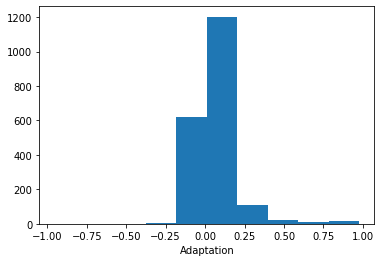

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


In [37]:
fig = plt.figure()

# YOUR CODE HERE
plt.hist(ephys_df['adaptation'])
plt.xlabel('Adaptation')
plt.show()


In [38]:
# Q2 tests
assert fig.axes[0]._visible

In [39]:
# Hidden tests for Q2

### Q3: _Create a subset with numeric columns only, drop rows and columns with `NA`s_ (2 pts)

- Assign the **number of rows** of `ephys_subset` to a variable called `subset_rows`.
- Assign the **number of columns** of `ephys_subset` to a variable called `subset_rows`.

In [40]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ephys_subset = ephys_df.select_dtypes(include=numerics)
ephys_subset = ephys_subset.dropna(axis=0).dropna(axis=1)

# YOUR CODE HERE
ephys_subset.shape
subset_rows = 601
subset_columns = 52
ephys_subset.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
479013100,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,3.862007,1.806510,-50.875000,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374
501566512,0.542358,307.100000,9.275000,0.155347,1.085160,8.536707,1.025427,-47.000000,-46.927086,-55.093753,...,8.553967,1.130500,-47.875004,-49.729168,-81.250005,2.718901,2.528137,3.060707,-95.500008,-80.050621
385492488,0.026335,57.290937,-2.252500,0.230118,1.220605,3.909120,1.025012,-48.718750,-49.625001,-50.287501,...,3.935860,1.418688,-57.562500,-55.854167,-76.443752,3.237865,3.761957,3.683673,-98.250000,-75.684387
490789494,0.014082,51.684722,16.169373,0.329911,1.189230,3.006398,1.024180,-63.062504,-62.156253,-64.671879,...,3.006433,1.250334,-63.156254,-62.270835,-66.820312,1.749210,1.692778,1.834847,-94.875008,-65.863571
486146828,0.023807,64.810714,-44.851872,0.245966,1.232415,3.425218,1.025796,-46.687504,-46.520836,-49.987504,...,3.473617,1.343680,-56.562504,-55.302086,-82.462502,4.462798,4.657636,3.995201,-99.593750,-81.016342


In [41]:
# Q3 tests
assert isinstance(subset_rows, int)
assert isinstance(subset_columns, int)

In [42]:
# Hidden tests for Q3

### Q4: _Add a column to separate fast- and slow-adapting specimens_ (4 pts)

- An empty column in `ephys_subset` (`ephys_subset['adaptation_type']`) is created below, fill in this column as follows:
    - Assign the rows for which `ephys_subset.adaptation` is **below its mean** the value `'slow'`
    - Assign the rows for which `ephys_subset.adaptation` is **greater than or equal to its mean** the value `'fast'`
    - _Hint:_ each the two operations can be accomplished along the lines of `df.loc[some_condition, 'column_name'] = 'value'`

In [43]:
ephys_subset['adaptation_type'] = pd.Series(index=ephys_subset.index)

# YOUR CODE HERE
#ephys_subset.adaptation.mean()

#ephys_subset['adaptation_type'].loc[(ephys_subset['adaptation'] < ephys_subset['adaptation'].mean()), 'adaptation_type' = 'slow']

#if ephys_subset['adaptation'] < ephys_subset['adaptation'].mean():
    #ephys_subset['adaptation_type'] == 'slow'
    
#else:
    #ephys_subset['adaptation_type'] = 'fast'



ephys_subset.loc[(ephys_subset['adaptation'] < ephys_subset['adaptation'].mean()), 'adaptation_type'] = 'slow'
ephys_subset.loc[(ephys_subset['adaptation'] >= ephys_subset['adaptation'].mean()), 'adaptation_type'] = 'fast'

ephys_subset.head()




,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,adaptation_type
specimen_id,,,,,,,,,,,,,,,,,,,,,
479013100,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,1.806510,-50.875000,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,slow
501566512,0.542358,307.100000,9.275000,0.155347,1.085160,8.536707,1.025427,-47.000000,-46.927086,-55.093753,...,1.130500,-47.875004,-49.729168,-81.250005,2.718901,2.528137,3.060707,-95.500008,-80.050621,fast
385492488,0.026335,57.290937,-2.252500,0.230118,1.220605,3.909120,1.025012,-48.718750,-49.625001,-50.287501,...,1.418688,-57.562500,-55.854167,-76.443752,3.237865,3.761957,3.683673,-98.250000,-75.684387,slow
490789494,0.014082,51.684722,16.169373,0.329911,1.189230,3.006398,1.024180,-63.062504,-62.156253,-64.671879,...,1.250334,-63.156254,-62.270835,-66.820312,1.749210,1.692778,1.834847,-94.875008,-65.863571,slow
486146828,0.023807,64.810714,-44.851872,0.245966,1.232415,3.425218,1.025796,-46.687504,-46.520836,-49.987504,...,1.343680,-56.562504,-55.302086,-82.462502,4.462798,4.657636,3.995201,-99.593750,-81.016342,slow


In [44]:
# Q4 tests
assert not ephys_subset.adaptation_type.isna().any() 

In [45]:
# Hidden tests for Q4

### Q5: _Normalize the subsetted data_ (4 pts)

- A new dataframe, `ephys_norm` is a copy of `ephys_subset` with the `'adaptation_type'` column dropped
- Normalize the data in this dataframe, the assign it back into `ephys_norm`

In [46]:
ephys_norm = ephys_subset.drop('adaptation_type', axis=1)
# YOUR CODE HERE
#ephys_norm = (ephys_subset - ephys_subset.mean())/ephys_subset.std()

ephys_norm = pd.DataFrame(stats.zscore(ephys_norm))
ephys_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.187544,0.277569,-1.230825,0.208953,-0.161354,-0.463745,-0.123280,0.963829,1.434628,1.431777,...,-0.398394,1.464881,0.981714,1.203211,-0.532268,-0.436009,-0.656997,-0.802168,-0.741693,-0.394732
1,5.851790,5.937935,0.409348,-0.416651,-0.716591,1.750994,-0.071621,0.485784,0.597141,-0.400333,...,1.361264,-1.475897,1.781240,1.588216,-1.387606,-0.799888,-1.025520,-0.352181,-0.513859,-1.273932
2,-0.411981,-0.615152,0.071943,0.266060,-0.000907,-0.424822,-0.409853,0.087412,-0.089279,0.743558,...,-0.370697,-0.222222,-0.800566,-0.282719,-0.465519,-0.110417,0.543899,0.440246,-0.959403,-0.462391
3,-0.560717,-0.762217,0.611143,1.177229,-0.166691,-0.849267,-1.088493,-3.237180,-3.277557,-2.679934,...,-0.719266,-0.954596,-2.291353,-2.242748,1.380750,-2.088177,-2.088098,-1.911506,-0.412598,1.362980
4,-0.442662,-0.417891,-1.174920,0.410758,0.061496,-0.652345,0.229634,0.558214,0.700502,0.814958,...,-0.544055,-0.548522,-0.534058,-0.114081,-1.620225,1.516974,1.683204,0.836518,-1.177112,-1.453428


In [47]:
# Q5 tests
assert 'adaptation_type' not in ephys_norm.columns
assert ephys_norm.shape[0] == ephys_subset.shape[0]
assert ephys_norm.shape[1] == (ephys_subset.shape[1] - 1)

In [48]:
# Hidden tests for Q5

### Q6: _Covariance matrix_ (2 pts)

- Compute the covariance matrix for `ephys_norm`, store it in a variable called `ephys_cov`
- Plot this covariance matrix (using `plt.imshow()`)

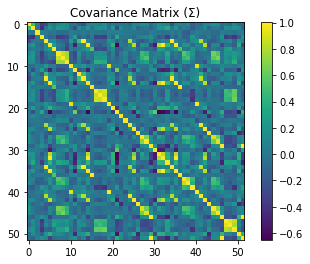

In [49]:
# YOUR CODE HERE
ephys_cov = ephys_norm.cov()

plt.imshow(ephys_cov)
plt.colorbar()
plt.title('Covariance Matrix (\u03A3)')
plt.show()

In [50]:
# Q6 tests
assert ephys_cov.shape == (52, 52)

In [51]:
# Hidden tests for Q6

### Q7: _Compute principal components_ (4 pts)

- Initialize a PCA with 5 components, store it in a variable called `pca`
- Fit this `pca` with the `ephys_norm` data
- Transform `ephys_norm` using this `pca`, and store it in a variable called `ephys_2D`

In [52]:
from sklearn.decomposition import PCA

# YOUR CODE HERE  
pca = PCA(n_components = 5) 
pca.fit(ephys_norm)
ephys_2D = pca.transform(ephys_norm) 

In [53]:
# Q7 tests
assert pca.n_components == 5

In [54]:
# Hidden tests for Q7

### Q8: _Add PCs to original ephys data subset dataframe_ (2 pts)

- Assign the first principal component to a column of `ephys_subset` called `'PC1'`
- Assign each of the other 4 to `ephys_subset['PC2']`, `ephys_subset['PC3']`, etc.

In [55]:
# YOUR CODE HERE
ephys_subset['PC1'] = ephys_2D[:, 0]
ephys_subset['PC2'] = ephys_2D[:, 1]
ephys_subset['PC3'] = ephys_2D[:, 2]
ephys_subset['PC4'] = ephys_2D[:, 3]
ephys_subset['PC5'] = ephys_2D[:, 4]

In [56]:
# Q8 tests
assert 'PC1' in ephys_subset.columns
assert 'PC2' in ephys_subset.columns
assert 'PC3' in ephys_subset.columns
assert 'PC4' in ephys_subset.columns
assert 'PC5' in ephys_subset.columns

In [57]:
# Hidden tests for Q8

### Q9: _Plot PC2 vs. PC1, coloring by adaptation type_ (2 pts)

- Create plot using `sns.lmplot()`
- Do the two adaptation types _fully segregate_ by the first 2 PCs? Answer yes/no by assigning either _`True`_ or _`False`_ to a variable called `answer`.

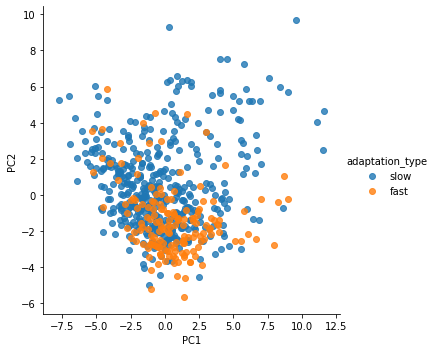

In [58]:
answer = False 

# YOUR CODE HERE
sns.lmplot("PC1", "PC2", data=ephys_subset, fit_reg=False, hue = 'adaptation_type')

In [59]:
# Q9 tests
assert isinstance(answer, bool)

In [60]:
# Hidden tests for Q9

### Q10: _Compute K-means clusters for k = 2_ (4 pts)

- Initialize a _k-means_ clustering analysis with **2** clusters, assign this to a variable called `kmeans`
- Fit `kmeans` with the data in `ephys_2D`
- Assign the resulting clusters to a column called `'kmeans_2'` in the `ephys_subset` dataframe
- Do you think this data is a good use case for _k_-means clustering?

In [61]:
from sklearn.cluster import KMeans

# YOUR CODE HERE
kmeans = KMeans(n_clusters=2) 

kmeans.fit(ephys_2D) 
#kmeans = kmeans.predict(ephys_2D) 

ephys_subset['kmeans_2'] = kmeans.predict(ephys_2D)

In [62]:
# Q10 tests
assert kmeans.n_clusters == 2
assert 'kmeans_2' in ephys_subset.columns

In [63]:
# Hidden tests for Q10

### Q11: _Plot PC2 vs. PC1 by K-means cluster for k = 2_ (2 pts)

- Create this plot using `sns.lmplot()` with the `ephys_subset` as data, using the `'kmeans_2'` for the hue
- Assign the cluster centers from `kmeans` to a variable called `centers`
- Add the `centers` to the plot using `plt.scatter()`
- Do these clusters resemble the groupings by adaptation type, why or why not? 
    - Store your answer (_`True`_ or _`False`_) in a variable called `answer`
    - and a short explanation (<=1 sentence, in the form of a string) in a variable called `explanation`

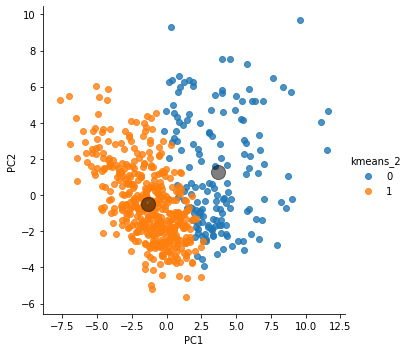

In [64]:
answer = False
explanation = 'These clusters do not represent the grouping displayed in the graph above. '

# YOUR CODE HERE
sns.lmplot("PC1", "PC2", hue='kmeans_2', data=ephys_subset, fit_reg=False)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


In [65]:
# Q11 tests
assert centers.shape == (2, 5)
assert isinstance(answer, bool)
assert isinstance(explanation, str)

In [66]:
# Hidden tests for Q11

## Part II: _Signal Processing_

- First, we will download some ECoG (electrocorticography, recordings made by placing electrodes directly on the surface of the cortex) data. The cell below will download and unzip the data for you, but if you have any trouble, you can download the data [here](http://neurotycho.brain.riken.jp/download/2015/20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap.zip) and upload it to the same folder as this assignment. *Make sure the entire file downloads (it is ~40 MB).*
- These data are from marmosets, provided courtesy of [NeuroTycho](http://neurotycho.org)
    - Reference: [Komatsu, M., Takaura, K., & Fujii, N. (2015). "Mismatch negativity in common marmosets: Whole-cortical recordings with multi-channel electrocorticograms." Scientific Reports, 5, 15006.](http://www.nature.com/articles/srep15006)
- The following cell will download and unzip the data, saving within the folder containing this notebook

(_All you need to do is run the following cell without modifications._)

In [67]:
import urllib.request
import zipfile 

# URL of data to download
data_url = "http://neurotycho.brain.riken.jp/download/2015/20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap.zip"

# retrieve the data from the url
local_filename, headers = urllib.request.urlretrieve(data_url, './ecog.zip')

# unzip the data
with zipfile.ZipFile(local_filename, 'r') as zip_ref:
    zip_ref.extractall('.')

OSError: [Errno 122] Disk quota exceeded: './ecog.zip'

- Next, we will load the ECoG data, saved as separate `.mat` files for each channel, into an array called `ecog_data`

(_All you need to do is run the following cell without modifications._)

In [68]:
import scipy.io

ecog_data = []
data_directory = "./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap" 
n_channels = 32
channels = list(range(1, n_channels + 1))

for channel in channels:
    channel_mat_path = "{}/ECoG_ch{}.mat".format(data_directory, channel)
    print("loading {}...".format(channel_mat_path))
    channel_mat = scipy.io.loadmat(channel_mat_path)
    channel_name = "ECoGData_ch{}".format(channel)
    ecog_data.append(channel_mat[channel_name][0])

ecog_data = np.array(ecog_data)
print(ecog_data.shape)

loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch1.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch2.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch3.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch4.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch5.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch6.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch7.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch8.mat...
loading ./20150120F1_Auditory+Oddball_Fr_Misako+Komatsu-Kana+Takaura_mat_ECoG32-Event-BrainMap/ECoG_ch9.mat...
l

In [69]:
ecog_data

array([[ 298,  290,  330, ..., -160, -169, -154],
       [ 127,  131,  178, ..., -180, -177, -143],
       [  84,   74,  107, ..., -187, -166, -147],
       ...,
       [   0,   -2,   55, ..., -194, -166, -162],
       [ -53,  -81,  -31, ..., -397, -384, -388],
       [ -33,  -56,   39, ..., -273, -285, -283]], dtype=int16)

- Finally, we will load the information on each of the ECoG array channels in a dataframe called `channels_df`

(_All you need to do is run the following cell without modifications._)

In [70]:
ElectrodesFr = scipy.io.loadmat("{}/ElectrodesFr.mat".format(data_directory))
channels_df = pd.DataFrame(np.array([np.array(channels), ElectrodesFr['X'][0], ElectrodesFr['Y'][0]]).T, columns=['channel', 'X', 'Y'])
channels_df

,channel,X,Y
0,1,573,331
1,2,477,333
2,3,395,341
3,4,291,335
4,5,209,345
5,6,592,270
6,7,508,264
7,8,429,249
8,9,351,249
9,10,270,274


### Q12: _Plot ECoG array electrode positions_ (2 pts)

- Create a scatterplot of the channels, with their x-coordinates (`channels_df.X`) on the x-axis, and their y-coordinates (`channels_df.Y`) on the y-axis
- Label the x-axis `'x-coordinate'` and the y-axis `'y-coordinate'`
- What do you notice about the pattern of electrodes?

Text(0, 0.5, 'y-coordinate')

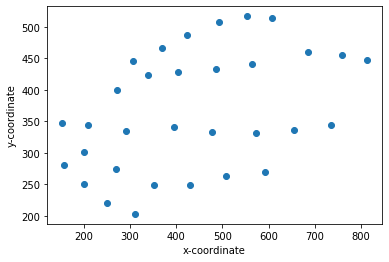

In [71]:
fig = plt.figure()

# YOUR CODE HERE
plt.scatter(channels_df.X, channels_df.Y)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

In [72]:
# Q12 tests
assert fig.axes[0]._visible

In [73]:
# Hidden tests for Q12

### Q13: _View ECoG recording data_ (6 pts)

- Create a loop going through each of the `channels`, adding each channel's data (remember the index in the `ecog_data` matrix is 1 less than the channel number) to the plot
- In order to offset the traces so they don't all overlap, add the value of `y` to each channel's data, increasing `y` by `y_offset` with each loop iteration
- There should be 32 total lines (this is worth points)
- Label the x-axis `'Samples'`

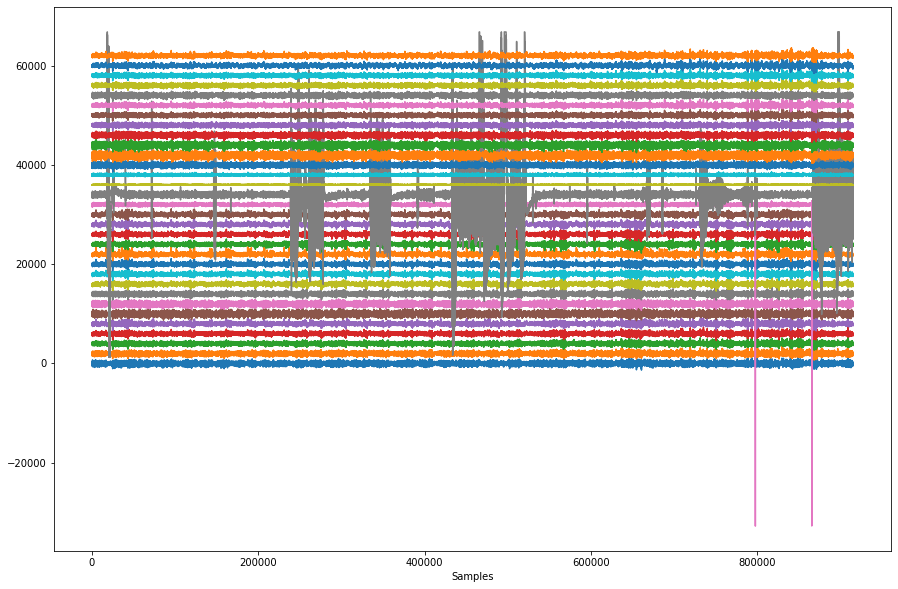

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
y = 0
y_offset = 2000

# YOUR CODE HERE
for channel in channels:
    plt.plot(ecog_data[channel-1,:] + y)
    y = y + y_offset
    
plt.xlabel('Samples')
plt.show()

#channels goes from 1 to 32
#ecog_data goes from 0 to 31

In [75]:
# Q13 tests
assert ax._visible

In [76]:
# Hidden tests for Q13

- Any signal can be decomposed into different frequency components
- _Neural oscillations_ refer to particular bands (frequency ranges) within a neural signal, with certain brain states and phenomena being associated with particular ranges
- We can examine the activity in a specified oscillatory band by computing a _band-pass_, which excludes any signal component outside the specified frequency ranges, but lets components within the range 'pass'
- Some commonly cited oscillations are listed below with their approximate frequency ranges:
    - [_alpha_](https://en.wikipedia.org/wiki/Alpha_wave) between 8 and 12 Hz
    - [_beta_](https://en.wikipedia.org/wiki/Beta_wave) between 12.5 and 30 Hz
    - [_gamma_](https://en.wikipedia.org/wiki/Gamma_wave) between 25 and 170 Hz
        - 'high' _gamma_ above ~90 Hz (which is particularly associated with spiking activity)
    - [_delta_](https://en.wikipedia.org/wiki/Delta_wave) between 0.4 and 4 Hz (often simply referred to as '_slow oscillations_')
    - [_theta_](https://en.wikipedia.org/wiki/Theta_wave) between 4 and 8 Hz

In [77]:
from scipy import signal

oscillations = {
    'alpha': [8, 12],
    'beta': [12.5, 30],
    'gamma': [25, 170],
    'high-gamma': [90, 170],
    'delta': [0.5, 4],
    'theta': [4, 8]
}

### Q14: _Compute bandpasses for each oscillation for channel 1_ (6 pts)

- We compute a bandpass by first applying a _low-pass filter_, followed by a _high-pass filter_ (or vice versa)
- Signal filtration is usually accomplished in 2 steps
    1. Design a _filter kernel_
    2. Apply the filter kernel to the data
- We will use a Butterworth filter
    - We design the filter in Python using `scipy`'s `signal.butter` function
        - It takes 3 arguments
            1. The _filter order_ (we'll use a 4th order filter)
            2. The _filter frequency_ (we must adjust for the sampling frequency, `f_s`, which is 1000 Hz for these data, i.e. 1000 data points were recorded per second)
            3. The type of filter (`'lowpass'` or `'highpass'`)
        - It returns 2 filter parameters, `a` and `b`
- Then, the bandpass filter is applied using `signal.filtfilt`, which takes as its parameters `b`, `a`, and the signal to be processed
- Below, an example bandpass computation is shown to extract the _alpha_ rhythm from the channel 1 data, the results are stored in a dictionary called `oscillations_filtered`, with the oscillation name (e.g. `'alpha'`) as the key
- **Compute the bandpasses for each of the other oscillations included in `oscillations` and add them to `oscillations_filtered`** (try doing it with a loop!)
- _(You may see a warning highlighted in pink, which you can ignore)_

In [78]:
channel = 1
data = ecog_data[channel-1, :]
f_s = 1000 # sampling frequency

oscillations_filtered = {}

oscillation ='alpha'
freqs = oscillations[oscillation]
f_L, f_H = freqs
print("filtering between {} and {} Hz for {} oscillation...".format(f_L, f_H, oscillation))
b, a = signal.butter(4, (f_H / (f_s / 2)), 'lowpass') # (f_H / (f_s / 2)) is to account for the sampling frequency
lowpassed = signal.filtfilt(b, a, data)
b, a = signal.butter(4, (f_L / (f_s / 2)), 'highpass')
a_bandpassed = signal.filtfilt(b, a, lowpassed)
oscillations_filtered[oscillation] = a_bandpassed

# YOUR CODE HERE
oscillation ='beta'
freqs = oscillations[oscillation]
f_L, f_H = freqs
print("filtering between {} and {} Hz for {} oscillation...".format(f_L, f_H, oscillation))
b, a = signal.butter(4, (f_H / (f_s / 2)), 'lowpass') # (f_H / (f_s / 2)) is to account for the sampling frequency
lowpassed = signal.filtfilt(b, a, data)
b, a = signal.butter(4, (f_L / (f_s / 2)), 'highpass')
b_bandpassed = signal.filtfilt(b, a, lowpassed)
oscillations_filtered[oscillation] = b_bandpassed

oscillation ='gamma'
freqs = oscillations[oscillation]
f_L, f_H = freqs
print("filtering between {} and {} Hz for {} oscillation...".format(f_L, f_H, oscillation))
b, a = signal.butter(4, (f_H / (f_s / 2)), 'lowpass') # (f_H / (f_s / 2)) is to account for the sampling frequency
lowpassed = signal.filtfilt(b, a, data)
b, a = signal.butter(4, (f_L / (f_s / 2)), 'highpass')
g_bandpassed = signal.filtfilt(b, a, lowpassed)
oscillations_filtered[oscillation] = g_bandpassed

oscillation ='high-gamma'
freqs = oscillations[oscillation]
f_L, f_H = freqs
print("filtering between {} and {} Hz for {} oscillation...".format(f_L, f_H, oscillation))
b, a = signal.butter(4, (f_H / (f_s / 2)), 'lowpass') # (f_H / (f_s / 2)) is to account for the sampling frequency
lowpassed = signal.filtfilt(b, a, data)
b, a = signal.butter(4, (f_L / (f_s / 2)), 'highpass')
hg_bandpassed = signal.filtfilt(b, a, lowpassed)
oscillations_filtered[oscillation] = hg_bandpassed

oscillation ='delta'
freqs = oscillations[oscillation]
f_L, f_H = freqs
print("filtering between {} and {} Hz for {} oscillation...".format(f_L, f_H, oscillation))
b, a = signal.butter(4, (f_H / (f_s / 2)), 'lowpass') # (f_H / (f_s / 2)) is to account for the sampling frequency
lowpassed = signal.filtfilt(b, a, data)
b, a = signal.butter(4, (f_L / (f_s / 2)), 'highpass')
d_bandpassed = signal.filtfilt(b, a, lowpassed)
oscillations_filtered[oscillation] = d_bandpassed

oscillation ='theta'
freqs = oscillations[oscillation]
f_L, f_H = freqs
print("filtering between {} and {} Hz for {} oscillation...".format(f_L, f_H, oscillation))
b, a = signal.butter(4, (f_H / (f_s / 2)), 'lowpass') # (f_H / (f_s / 2)) is to account for the sampling frequency
lowpassed = signal.filtfilt(b, a, data)
b, a = signal.butter(4, (f_L / (f_s / 2)), 'highpass')
t_bandpassed = signal.filtfilt(b, a, lowpassed)
oscillations_filtered[oscillation] = t_bandpassed

oscillations_filtered

filtering between 8 and 12 Hz for alpha oscillation...
filtering between 12.5 and 30 Hz for beta oscillation...
filtering between 25 and 170 Hz for gamma oscillation...
filtering between 90 and 170 Hz for high-gamma oscillation...
filtering between 0.5 and 4 Hz for delta oscillation...
filtering between 4 and 8 Hz for theta oscillation...


/opt/conda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


{'alpha': array([31.38842391, 33.67112177, 35.75553588, ..., 15.89841289,
        16.25340434, 16.4226109 ]),
 'beta': array([-16.73115622, -13.79351263, -10.4831542 , ...,   5.46731791,
          0.36726843,  -4.85752212]),
 'gamma': array([ 0.70142538, 12.19663849, 23.79537516, ..., -8.36383516,
        -4.29776222, -0.07311174]),
 'high-gamma': array([-0.45498207,  1.35602197,  4.81952958, ..., -6.48314998,
        -3.56056455, -0.95046969]),
 'delta': array([94.20593834, 92.50296575, 90.79916392, ..., -8.54105612,
        -8.04212255, -7.54218895]),
 'theta': array([45.57615847, 43.21494571, 40.75185332, ..., -2.54886995,
        -1.94879871, -1.37459812])}

In [79]:
# Q14 tests
assert 'alpha' in oscillations_filtered
assert 'beta' in oscillations_filtered
assert 'gamma' in oscillations_filtered
assert 'high-gamma' in oscillations_filtered
assert 'delta' in oscillations_filtered
assert 'theta' in oscillations_filtered

In [80]:
# Hidden tests for Q14

### Q15: _Plot channel 1 data with bandpassed oscillations_ (6 pts)

- Create a figure with 7 subplots (the raw ECoG data plus each of the bandpassed oscillations)
- Entitle the first row `'Raw ECoG'`
- Then, for each oscillation, entitle its subplot `'<oscillation> band'` (i.e. `oscilation + ' band'`, or equivalently `'{} band'.format(oscillation)`)
- Label the x-axis `'Samples'` for the bottom row

In [81]:
num_samples = len(ecog_data[channel]) # number of samples
time_vector = np.arange(num_samples) / f_s # create a time vector

In [82]:
oscillation

'theta'

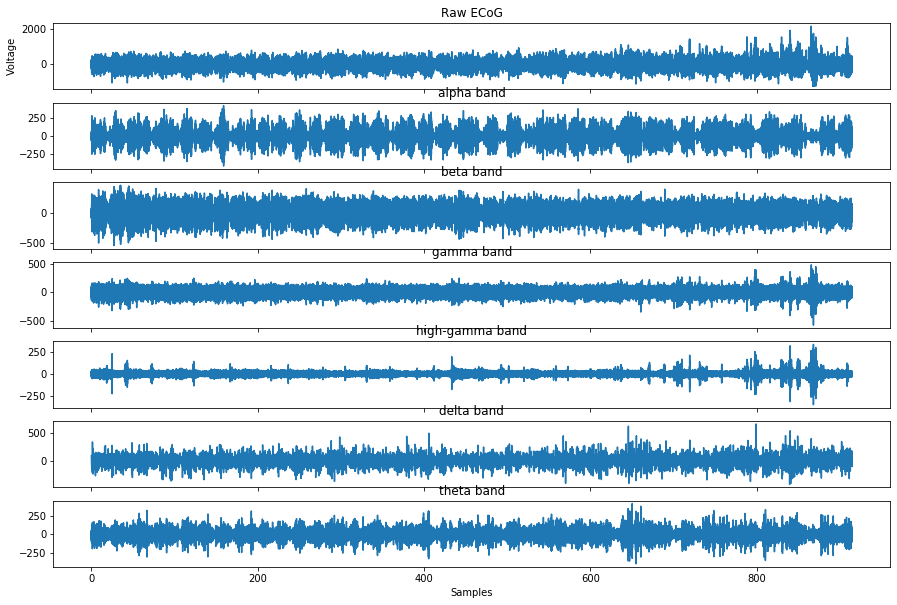

In [83]:
fig, ax = plt.subplots(7, 1, figsize=(15,10), sharex=True)

# YOUR CODE HERE



# Plot our raw data
ax[0].plot(time_vector,ecog_data[channel])
ax[0].set_ylabel('Voltage')
ax[0].set_title('Raw ECoG')

# Plot the bandpassed data
ax[1].plot(time_vector,a_bandpassed)
ax[2].plot(time_vector, b_bandpassed)
ax[3].plot(time_vector, g_bandpassed)
ax[4].plot(time_vector, hg_bandpassed)
ax[5].plot(time_vector, d_bandpassed)
ax[6].plot(time_vector, t_bandpassed)

# Let's programmatically set the title here, using {} format
ax[1].set_title('alpha band')
ax[2].set_title('beta band')
ax[3].set_title('gamma band')
ax[4].set_title('high-gamma band')
ax[5].set_title('delta band')
ax[6].set_title('theta band')

plt.xlabel('Samples')
plt.show()

In [84]:
# Q15 tests
assert len(fig.axes) == 7

In [85]:
# Hidden tests for Q15

### 